# Spout detection 

This notebooks implements several image processing techniques for locating the spout coordinates from where the mice are supposed to lick. We apply a Gaussian blurring filter, a composition of several moropholical operators and finally a blob detector.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def display_image(mat, axes=None, cmap=None, hide_axis=True):
    img = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB) if mat.ndim == 3 else mat
    cmap= cmap if mat.ndim != 2 or cmap is not None else 'gray'
    if axes is None:
        if hide_axis:
            plt.xticks([])
            plt.yticks([])
        return plt.imshow(img, cmap=cmap)
    else:
        if hide_axis:
            axes.set_xticks([])
            axes.set_yticks([])
        return axes.imshow(img, cmap=cmap)

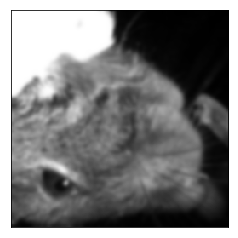

In [62]:
image = cv2.imread('img162.png', cv2.IMREAD_GRAYSCALE) # try with two images 'frame3.tif' and 'img162.png'
blurred = cv2.GaussianBlur(image, (11, 11), 0)
display_image(blurred)

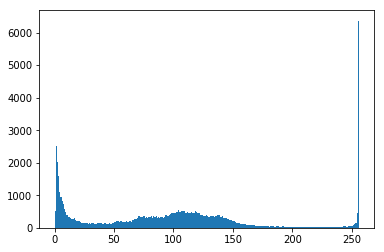

In [63]:
plt.hist(blurred.ravel(),256,[0,256])
plt.show()

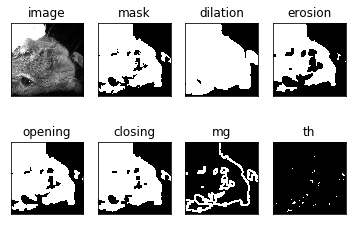

In [64]:
# EXPLORATION OF MORPHOLOGICAL OPERATORS
kernal = np.ones((7,7), np.uint8)
_,thresh = cv2.threshold(blurred, 80, 255, cv2.THRESH_BINARY)
dilation = cv2.dilate(thresh, kernal, iterations=2)
erosion = cv2.erode(thresh, kernal, iterations=1)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernal)

titles = ['image', 'mask', 'dilation','erosion','opening','closing','mg','th']
images = [image, thresh, dilation,erosion,opening,closing,mg,th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

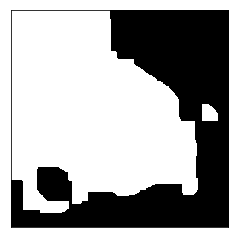

In [67]:
inter = cv2.dilate(thresh, kernal, iterations=2)
inter2 = cv2.erode(inter, kernal, iterations=5)
final = cv2.dilate(inter2,  np.ones((3,3), np.uint8), iterations=4)
display_image(final)

Spout coordinates:[[232.06976 121.93023]]


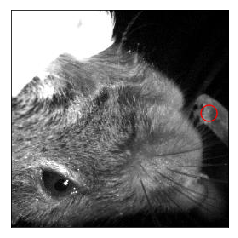

In [68]:
params = cv2.SimpleBlobDetector_Params()
params.filterByColor = True
params.blobColor = 255;

ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(final)
points2f=cv2.KeyPoint_convert(keypoints)
print("Spout coordinates:"+str(points2f[:]))

imgKeyPoints = cv2.drawKeypoints(image, keypoints, np.array([]),(0,0,255), 
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_image(imgKeyPoints)

